Model error estimate without ENKF:   0%|          | 0/30 [00:00<?, ?it/s]c:\Users\y-osw\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:212: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\y-osw\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:175: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:   3%|▎         | 1/30 [00:05<02:42,  5.60s/it]c:\Users\y-osw\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:212: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\

this is total_wealth_ts [[ 5395619.78531872  5424147.94925739  5464085.56825918 ...
  11586751.74194165 11626001.21861507 11626001.21861507]
 [ 3202555.34856464  3202963.8322068   3214424.93365084 ...
   6722312.79947027  6728959.03590289  6728959.03590289]
 [ 2173642.45419145  2190336.02950813  2193352.54712837 ...
   4631423.38677552  4633093.13853823  4648709.58953242]
 ...
 [ 3495743.2875527   3498044.95148216  3498044.95148216 ...
   7273236.9295621   7274017.12209845  7292780.3126239 ]
 [ 4353107.21428116  4353597.5284732   4362932.68749415 ...
   9655286.90271854  9661270.14851525  9672262.02740484]
 [ 4107060.74539456  4110480.58429124  4110480.58429124 ...
   9971308.19764005  9973626.63583474  9973626.63583474]]
this is total_wealth_ts [[12127183.96854542 12161166.04617824 12202364.85314851 ...
  27329185.8848796  27395739.34532585 27455589.83862659]
 [11936702.06388969 11964478.95155598 11997224.95568183 ...
  27256436.86204114 27327053.12413772 27410302.20653125]
 [ 7877357

C:\Users\y-osw\AppData\Local\Temp\ipykernel_17256\4058445094.py:224: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
C:\Users\y-osw\AppData\Local\Temp\ipykernel_17256\4058445094.py:228: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])


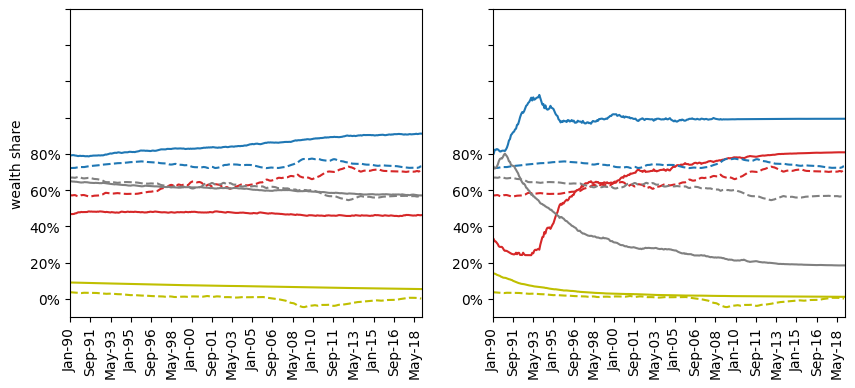

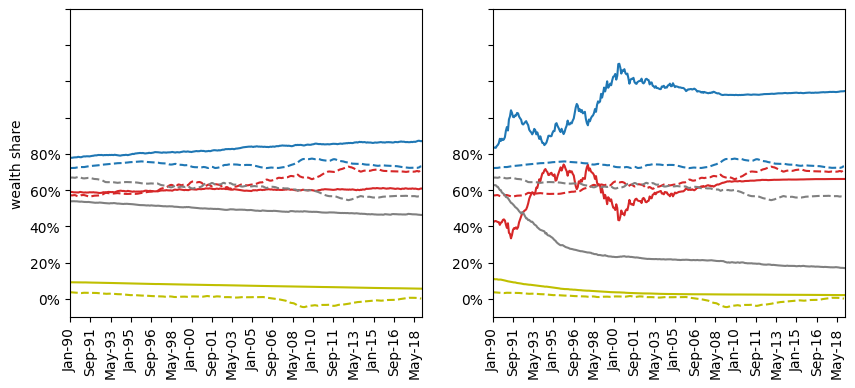

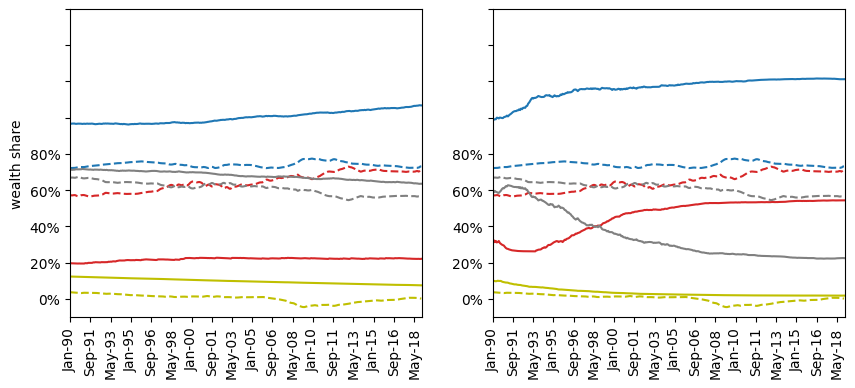

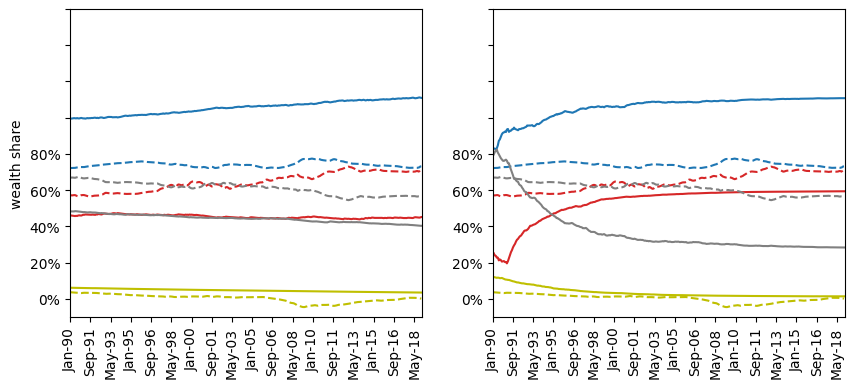

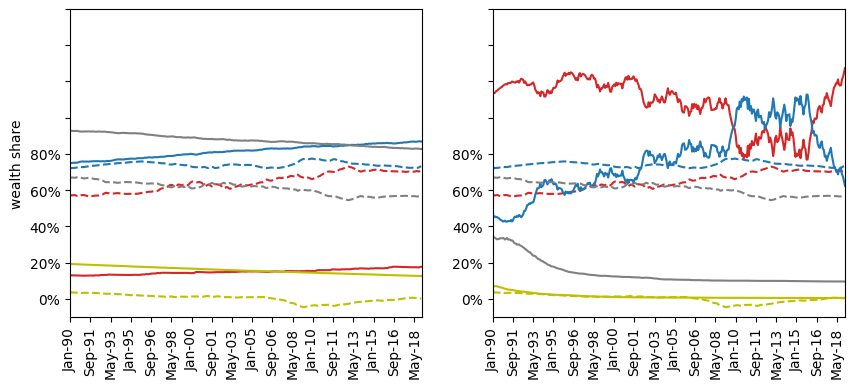

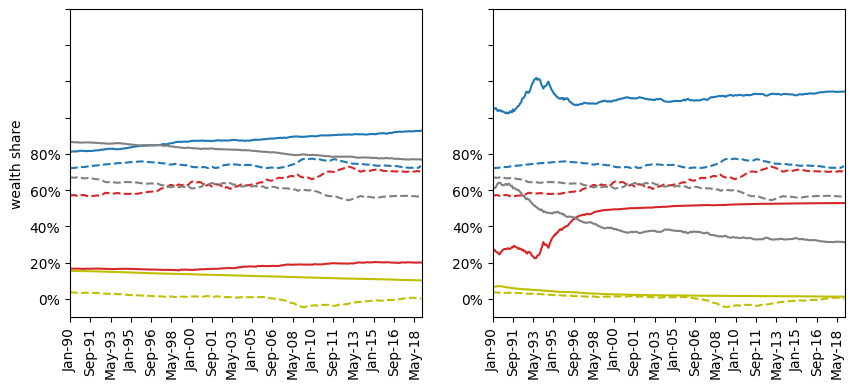

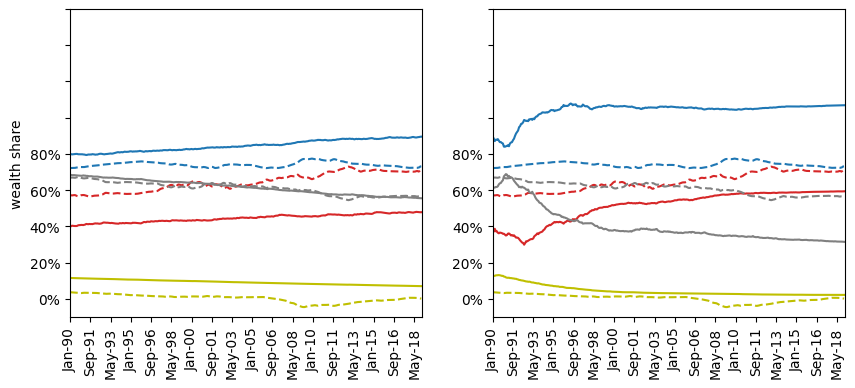

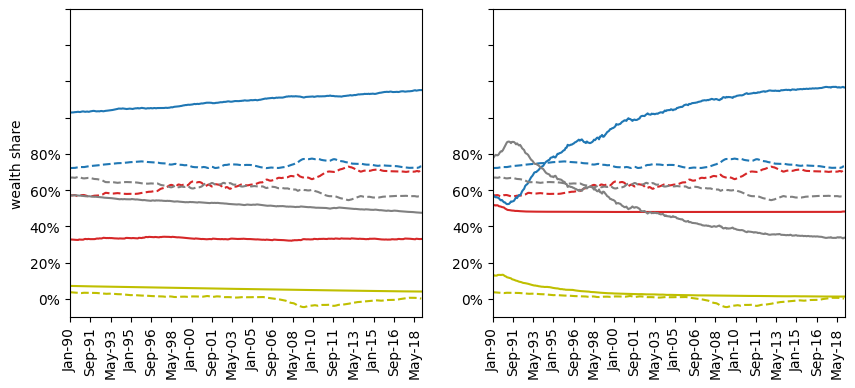

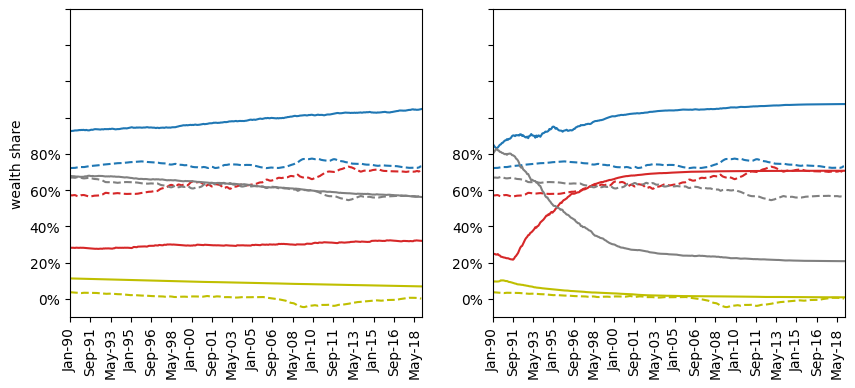

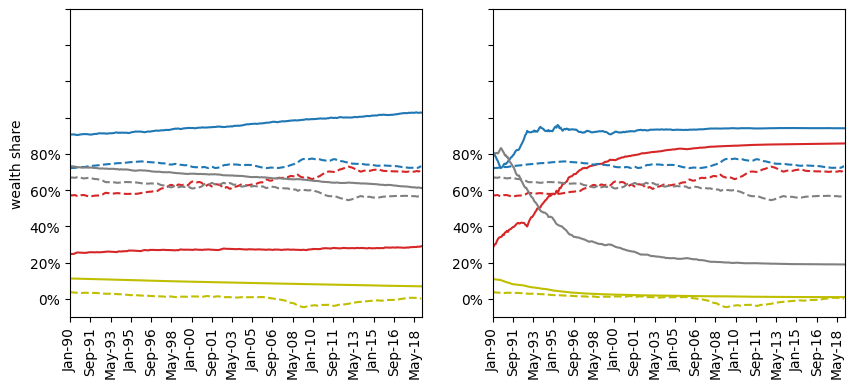

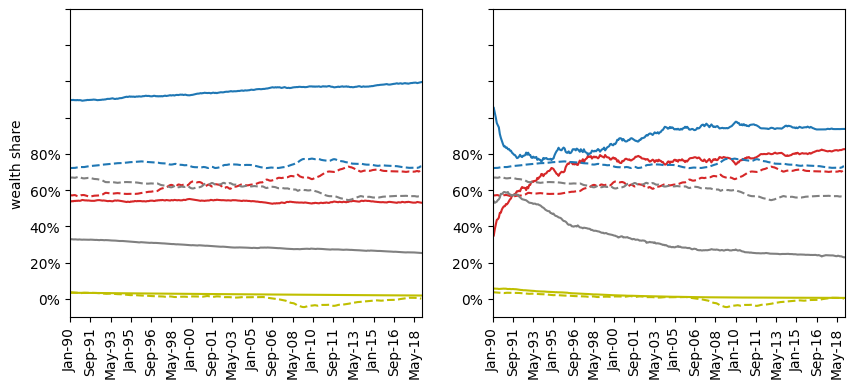

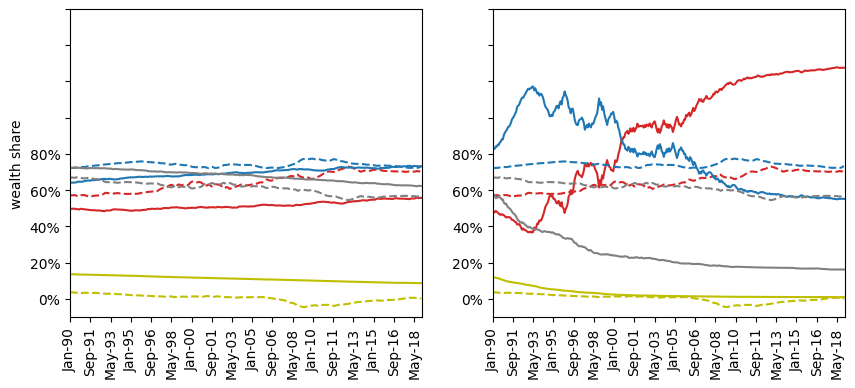

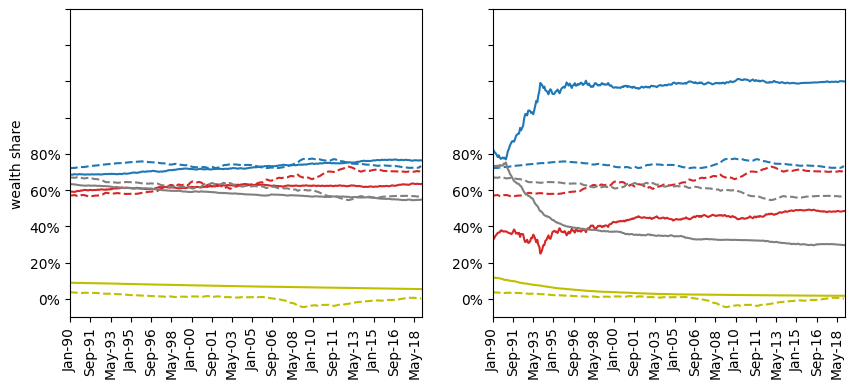

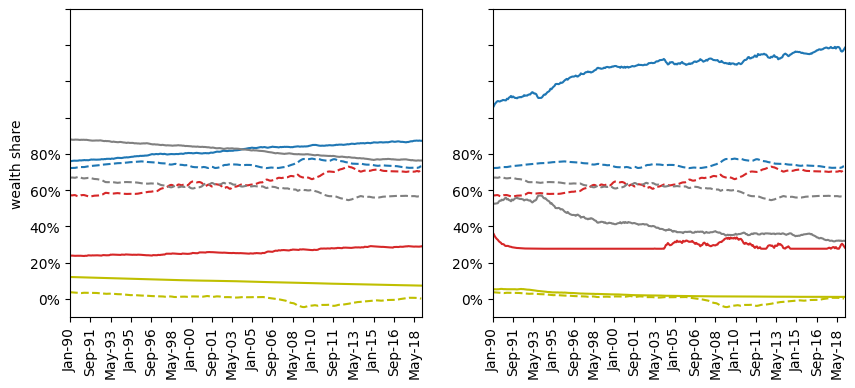

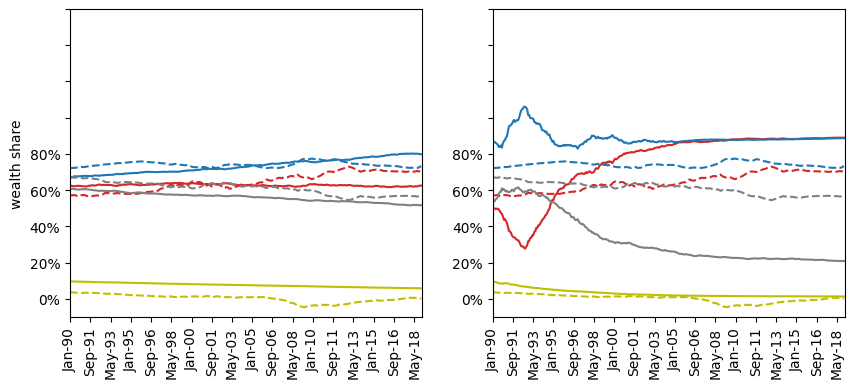

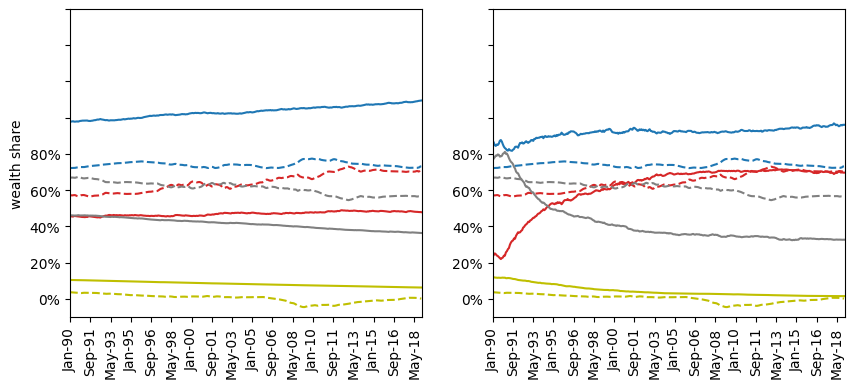

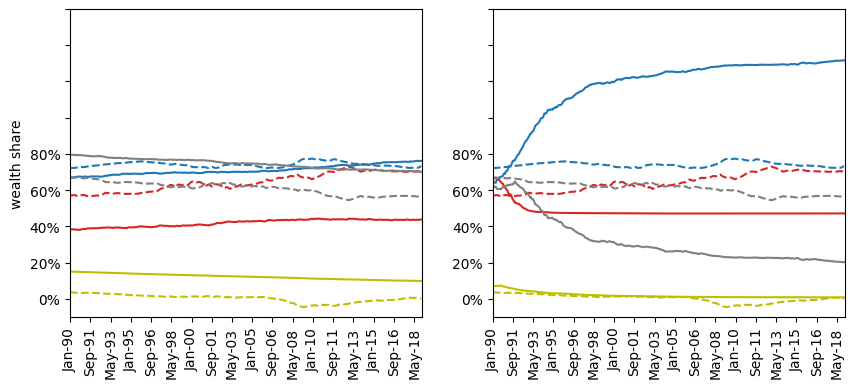

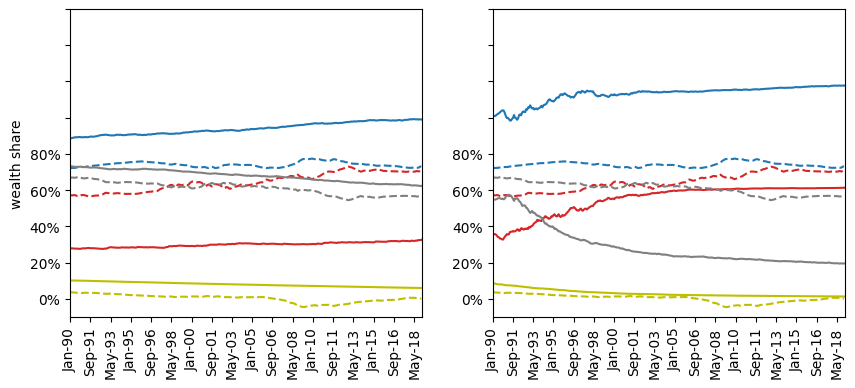

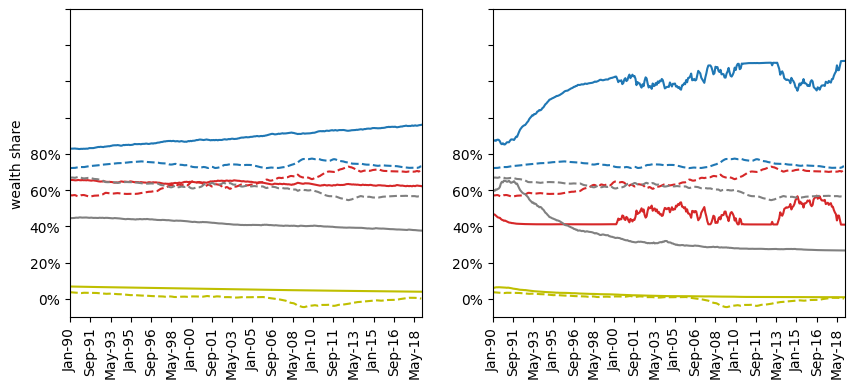

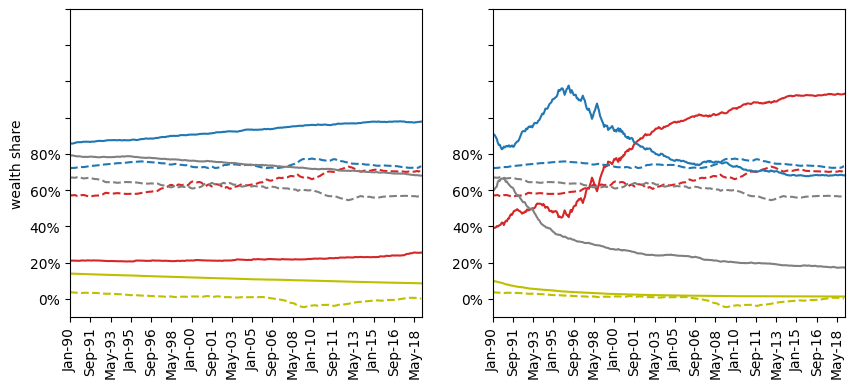

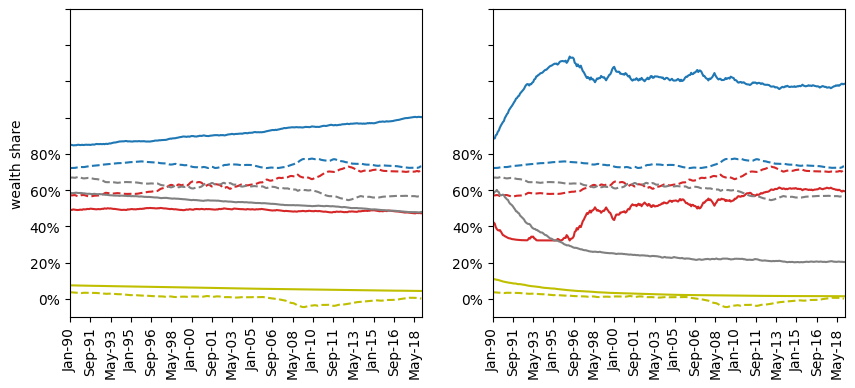

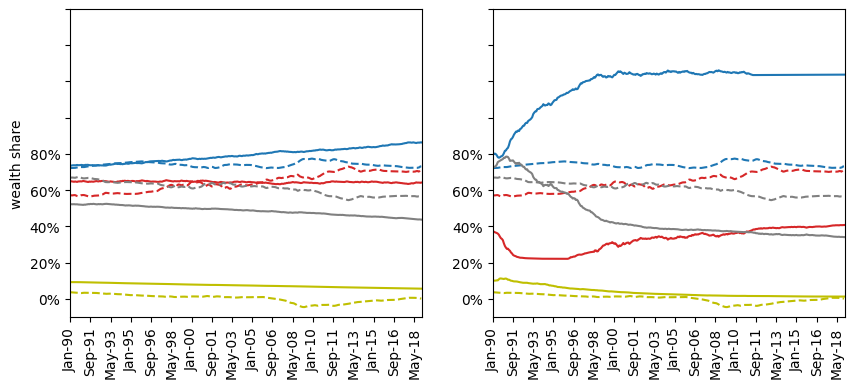

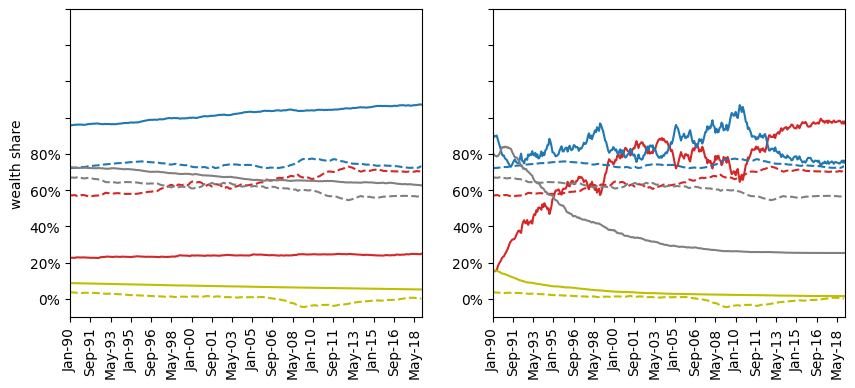

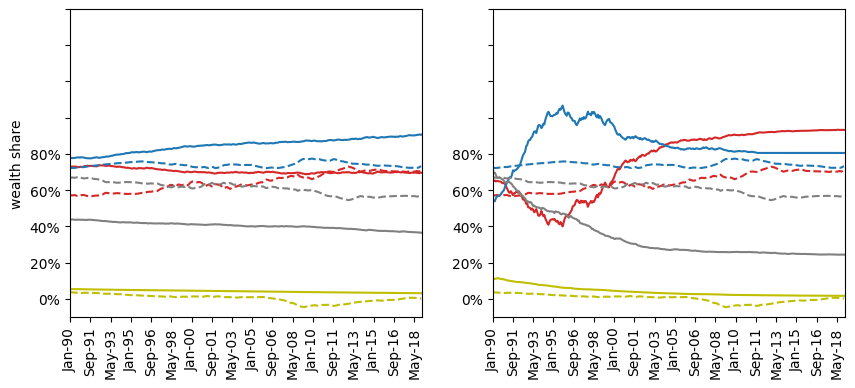

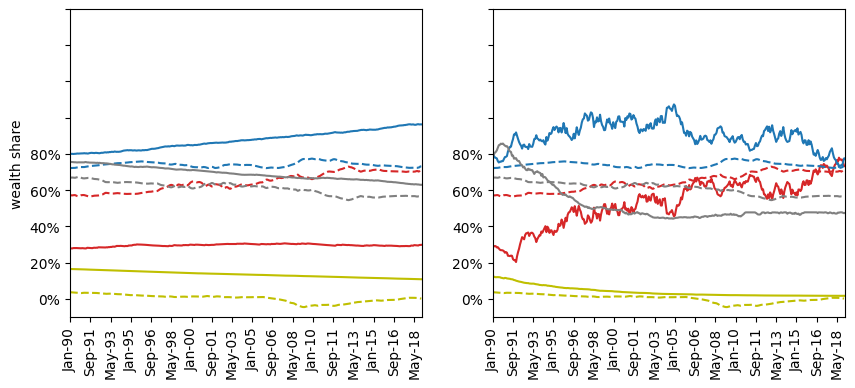

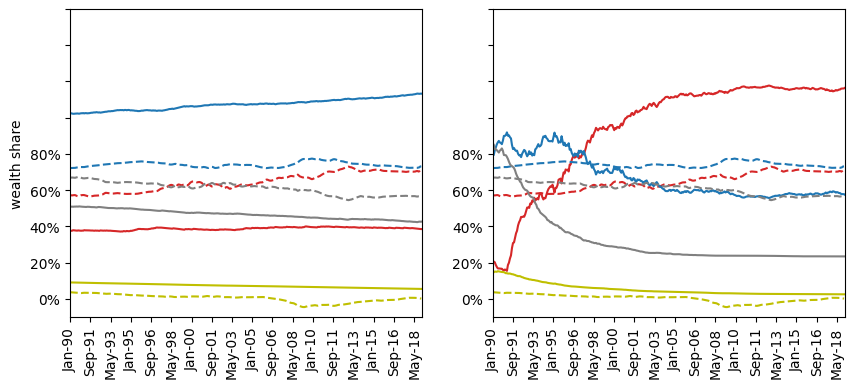

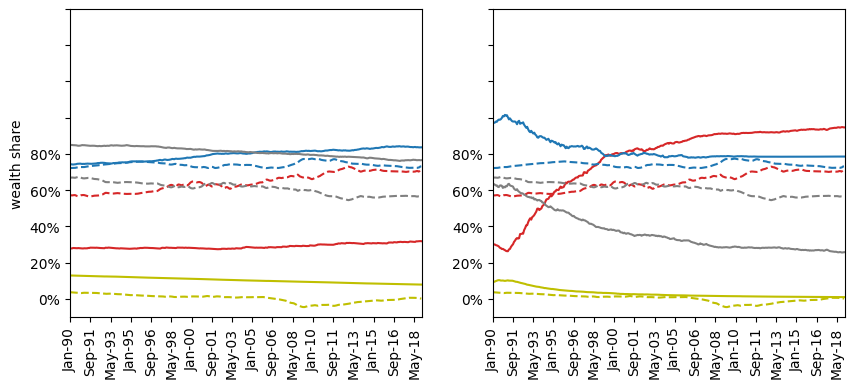

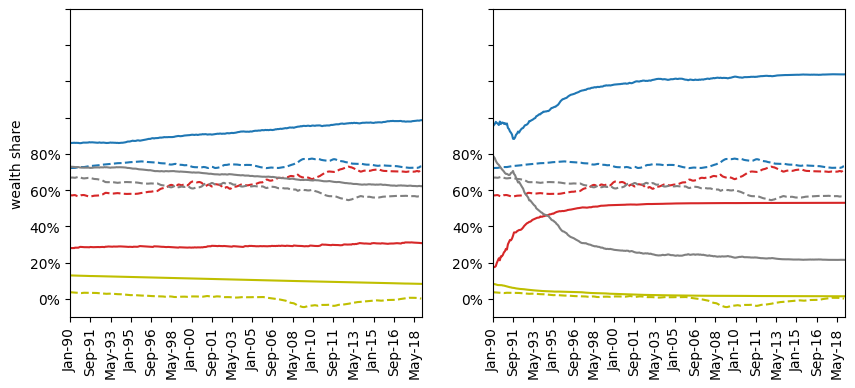

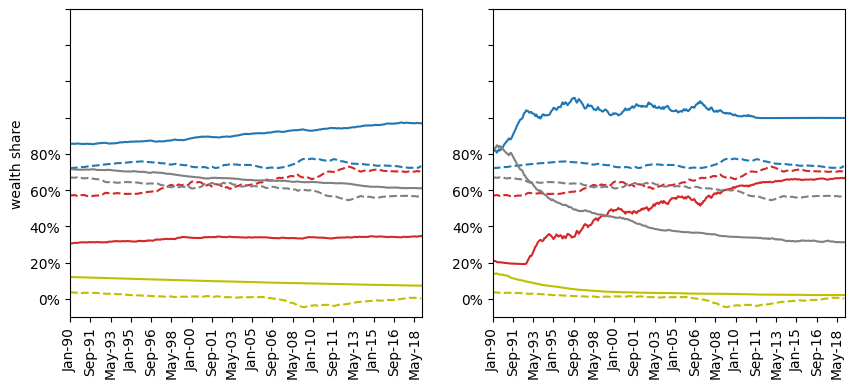

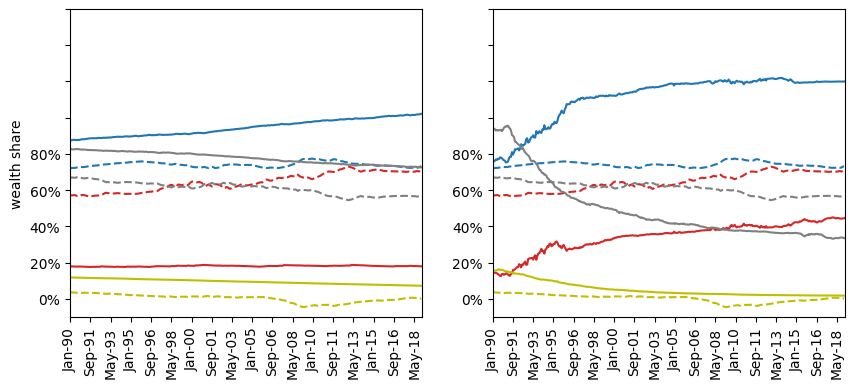

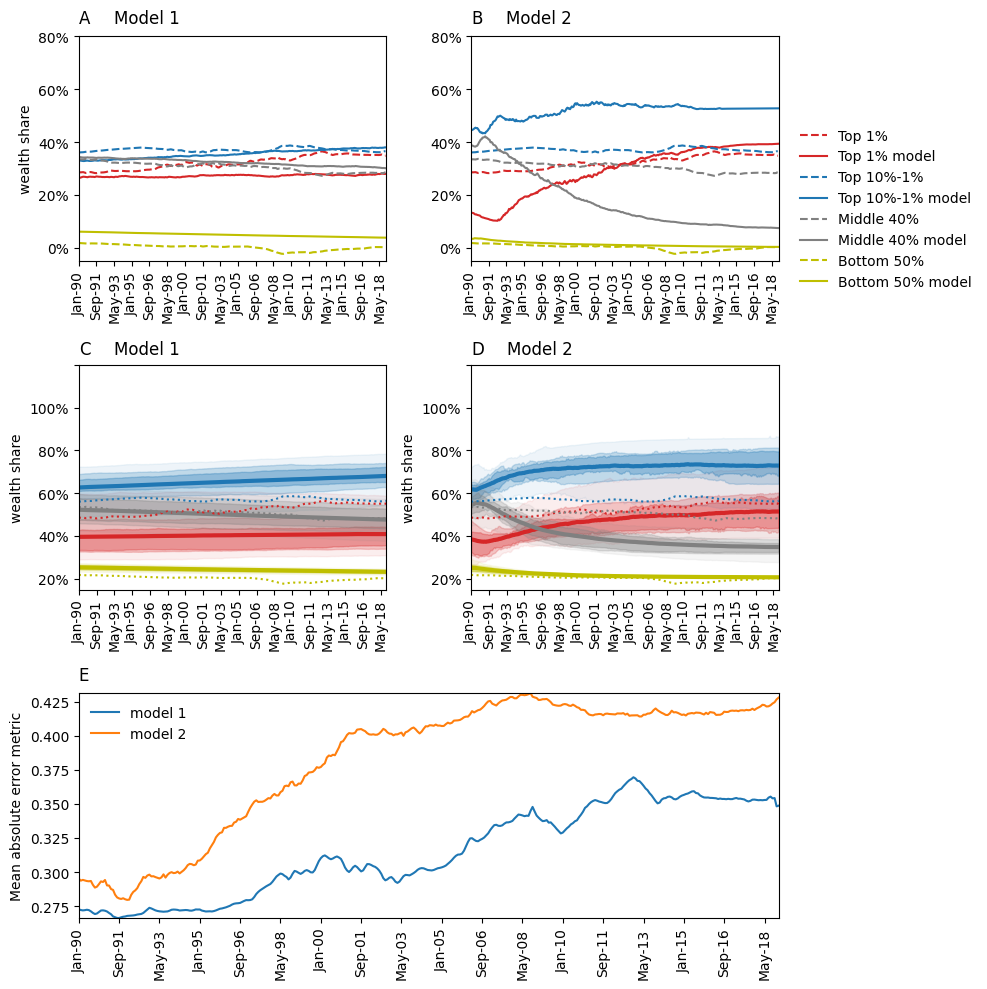

In [1]:
#General packages
import os
import numpy as np
from tqdm import tqdm  ### package for progress bars
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
### MODEL 1 infrastructure
from model1_class import Model1
from run_enkf import *
### MODEL 2 infrastructure
from model2_class import Model2


import pandas as pd


class benchmarking_error_simple:
    
    def __init__(self, ensemble_size, **kwargs):
        
        self.model1_data = list()
        self.model2_data = list()
        self.ensemble_size = ensemble_size
        ### LOAD and PREPARE DATA
        path = ".."
        with open(os.path.join(path, 'data', 'wealth_data_for_import2.csv')) as f2:
            self.df = pd.read_csv(f2, encoding = 'unicode_escape')   
        
        ### Set up variables for data storage and passing between methods
        self.subset_df = None
        self.mean_error_model1 = None
        self.mean_error_model2 = None

    # ERROR computing function
    def quantify_error(self, model_output, data_vector):
        
        """
        Compute the error metric as the average absolute distance between 
        the model output and the data vector
    
        :param model_output: 2D numpy array of shape [n, 4]
        :param data_vector: 2D numpy array of shape [n, 4]
        :return: float, the average error metric
        """
        # Ensure dimensions are correct
        assert model_output.shape == (model_output.shape[0], 4), "Model output should have shape [n, 4]"
        assert data_vector.shape == (data_vector.shape[0], 4), "Data vector should have shape [n, 4]"
        # Calculate absolute differences between the model output and data vector
        abs_diffs = np.abs(model_output - data_vector)    
        # sum differences across four wealth groups as in equation 6 of the paper first summation sign
        # second summation sign and average is over ensemble runs and done in compute error 
        abs_diffs_sum = np.sum(abs_diffs, axis = 1)
        ## take mean of
        #abs_diffs_mean = np.mean(abs_diffs, axis = 1)
        # Return the average absolute difference as well as the error per group
        return abs_diffs_sum


    def collect_data(self):
     
       """
       RUN MODEL n times and collect data
       
       """
       ## run models n times and write out data 
       for i in tqdm(range(self.ensemble_size), desc = "Model error estimate without ENKF"):
            # Set up both model economies
            economy1 = Model1(population_size=100,
                              growth_rate=0.025, 
                              b_begin=1.3,
                              distribution="Pareto_lognormal",
                              start_year=1990,
                              uncertainty_para = 0.1)
        
            economy2 = Model2(100,
                          concavity=1,
                          growth_rate = 0.025, 
                          start_year = 1990,
                          adaptive_sensitivity=0.02,
                          uncertainty_para = 0)
        
            ## define time horizon
            time_horizon = 29*12 ## 29 years * 12 months | from Jan 1990 to Dec 2018
            ### initialize model 1
            economy1.make_agents()
            ### run the models
            for i in range(time_horizon):
                economy1.step()
                economy2.step()
            fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
            self.model1_data.append(economy1.plot_wealth_groups_over_time(ax1, time_horizon))
            self.model2_data.append(economy2.plot_wealth_groups_over_time(ax2, time_horizon))

    def compute_error(self):
        
        df = self.df
        # Subset the dataframe
        subset_df = df[((df['year'] == 1990) & (df['month'] == 'Jan')) |
                       ((df['year'] > 1989) & (df['year'] < 2019)) |
                       ((df['year'] == 2018) & (df['month'] == 'Dec'))]
        self.subset_df = subset_df
        # Extract data for each group and store in a list of arrays
        arrays = [subset_df[subset_df['group'] == grp]['real_wealth_share'].to_numpy() for grp in subset_df['group'].unique()]
        # Get the maximum length among the arrays
        max_len = max(len(arr) for arr in arrays)
        # Ensure all arrays are of the same length by appending a specific value (like np.nan) to shorter arrays
        arrays = [np.concatenate([arr, [np.nan]*(max_len - len(arr))]) for arr in arrays]
        # Horizontally stack arrays to get the desired result
        data_array = np.column_stack(arrays)

        ## use numpy mean 
        errors_model1 = np.zeros((data_array.shape[0], self.ensemble_size))
        errors_model2 = np.zeros((data_array.shape[0], self.ensemble_size))
        
        for i in range(self.ensemble_size):
            errors_model1[:,i] = self.quantify_error(self.model1_data[i], data_array)
            errors_model2[:,i] = self.quantify_error(self.model2_data[i], data_array)
            
        # Second summation sign and averaging in equation 6
        self.mean_error_model1 = np.mean(errors_model1,axis = 1)
        self.mean_error_model2 = np.mean(errors_model2,axis = 1)
        
        
        # Convert the mean error arrays to a single pandas DataFrame
        errors_df = pd.DataFrame({
            'mean_error_model1': self.mean_error_model1,
            'mean_error_model2': self.mean_error_model2
        })
    
        # Define the sub-folder name (the sub-folder is assumed to exist)
        sub_folder_name = 'data'
        
        # Get the parent directory of the current script
        parent_dir = os.path.dirname(os.getcwd())
        
        # Construct the path to the sub-folder
        sub_folder_path = os.path.join(parent_dir, sub_folder_name)
    
        # Define the file path for the CSV
        errors_csv_path = os.path.join(sub_folder_path, 'mean_errors.csv')
    
        # Save the DataFrame to a CSV file
        errors_df.to_csv(errors_csv_path, index=False)
        #print(f'Mean errors saved to {errors_csv_path}')
    
    
    def plot_graph(self, ax):
    
        #fig, ax = plt.subplots(figsize=(10,4))
        x = self.subset_df["date_short"][::4].reset_index(drop = True)
        ax.plot(x, self.mean_error_model1, label = "model 1")
        ax.plot(x, self.mean_error_model2, label = "model 2")
        ax.set_xticks(x.iloc[0::20].index)
        ax.set_xticklabels(x.iloc[0::20], rotation = 90)
        ax.legend(frameon = False)
        ax.set_ylabel("Mean absolute error metric")
        ax.margins(0)
        #plt.savefig('fig3.png',  bbox_inches='tight', dpi=300)
        



#%% benchmarking fangraph of both models 


period_length = 29*12
model_params1 = {"population_size": 100,
 "growth_rate": 0.025,
 "b_begin": 1.3,
 "distribution": "Pareto_lognormal",
 "start_year": 1990,
 "uncertainty_para": 0.1}

model_params2 = {"population_size": 100, 
                "concavity": 1,
                "growth_rate": 0.025, 
                "start_year": 1990,
                "adaptive_sensitivity": 0.02,
                "uncertainty_para": 0}

enkf1 = prepare_enkf(Model1, model_params1, uncertainty_obs = 0.5, ensemble_size=30, macro_state_dim=4, filter_freq=500)
enkf2 = prepare_enkf(Model2, model_params2, uncertainty_obs = 0.5, ensemble_size=30, macro_state_dim=4, filter_freq=500)
run_enkf(enkf1, time_horizon = period_length, filter_freq = 500)
run_enkf(enkf2, time_horizon = period_length, filter_freq = 500)

#### RUN BENCHMARK CLASS FROM ABOVE WHICH IS DIFFERENT FROM THE PREPARE ENKF 
benchmark = benchmarking_error_simple(30)
benchmark.collect_data()
benchmark.compute_error()


# Now let's say you want to integrate this into another grid layout
fig = plt.figure(figsize=(10, 10))

# Create a gridspec object
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])
# Create individual subplots
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[1, 1])
ax4 = plt.subplot(gs[2, :])  # This one spans both columns


enkf1.models[0].plot_wealth_groups_over_time(ax0, period_length)
enkf2.models[0].plot_wealth_groups_over_time(ax1, period_length)
enkf1.plot_fanchart(ax2)
enkf2.plot_fanchart(ax3)
benchmark.plot_graph(ax4)

###EXTRAS
#AX0
ax0.text(0,0.85, 'A', fontsize = 12)
ax0.text(40,0.85, 'Model 1', fontsize = 12)


#AX1
ax1.legend(loc=(1.05, -0.15), frameon = False)
ax1.text(0,0.85, 'B', fontsize = 12)
ax1.text(40,0.85, 'Model 2', fontsize = 12)

#AX2
ax2.text(0,1.05, 'C', fontsize = 12)
ax2.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
ax2.text(40,1.05, 'Model 1', fontsize = 12)

#AX3
ax3.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
ax3.text(0,1.05, 'D', fontsize = 12)
ax3.text(40, 1.05, 'Model 2', fontsize = 12)


#AX4
# Get the limits
x_min, x_max = ax4.get_xlim()
y_min, y_max = ax4.get_ylim()
ax4.text(0,y_max+0.01, 'E', fontsize = 12)
plt.tight_layout()
plt.savefig('fig2.png', dpi = 300)

plt.show()
